## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi) #retourne l'index du max de la liste

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Création des données d'entrainement

In [2]:
datas = []
labels = []
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()           #avoir une seule liste

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


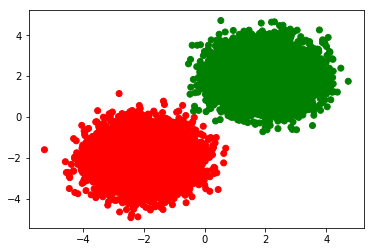

In [3]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)  #scatter pour tracer les points
plt.show()

In [4]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [5]:
list(datas[0])+[labels[0]]

[-2.0065935952107505, -1.7669124155504612, 0.0]

In [6]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                  ord couleur
0      -2.0065935952107505  -1.7669124155504612     red
1      -1.4814171147031727   -2.489106940566984     red
2       -2.275157793908542   -1.304853853610311     red
3       -1.052636434188183  -2.7311142848407064     red
4      -1.3971691380771467  -1.1807838172191452     red
5      -1.1117774426393234  -2.6329777136496837     red
6       -2.436090068606529  -3.5678389298078037     red
7       -2.813205936794939   -3.616154373985495     red
8      -1.7038516914887383  -1.6627949901656285     red
9       -2.620218107801805   -2.492010338668221     red
10     -3.2080670568793943  -1.6506508257484644     red
11     -1.7509124714819673  -1.0612169065164072     red
12      -3.008422927021976  -2.8133196133484715     red
13     -1.8412814711730683  -2.4333206979912987     red
14     -1.0815448612310998  -1.9872352705421104     red
15      -1.302046720792354  -2.4430165870487253     red
16     -2.4385544301007873   -2.440358323142792     red
17     -3.0320126099010043  -1.7878918870278087     red
18     -2.5033908877414865   -1.210502070355262     red
19     -1.1345184608676102  -2.4261239465765976     red
20     -2.9942153196949715  -2.4805747717667357     red
21     -1.8375974146221223   -2.236498285622654     red
22     -2.4642568799562454  -1.9016508045251688     red
23     -1.9792485166852651   -1.987111107264175     red
24     -2.4071017831079553  -1.9527709931281656     red
25      -2.447804290327049   -2.591344918728627     red
26      -1.555509220084865   -2.239981318801109     red
27      -2.740721257186385  -1.2542951774139544     red
28     -2.8754885798057384   -2.244993946775144     red
29     -1.7685413336433435  -2.1124707436389505     red
...                    ...                  ...     ...
19970    1.957284739047881   2.5266033918887048   green
19971   1.7786674608147102    1.940685025626479   green
19972   1.8732006527836318   1.4664381077053452   green
19973    3.001558409956188   1.4961773586752083   green
19974   1.8363637584319916   1.1647692822272617   green
19975    2.820308890931729   1.6024508032027427   green
19976   1.3061584326461704   1.3836628479335857   green
19977   0.6877579084224983    1.407995887291882   green
19978    3.227981399586084   1.8103112718653147   green
19979   2.6086597365680633   2.9361961628963487   green
19980   0.9870749786876785   3.0628016115879353   green
19981   1.0716516322734373   2.7414693161835935   green
19982   2.7816342528809983   1.7152030284543405   green
19983   1.7329103041493368   2.6638959342761632   green
19984    2.067104665771566   2.0696703276673354   green
19985   1.7982851194633778   2.2195075739143655   green
19986   3.2515777682774916   1.7505854962461582   green
19987    2.529153647182521   2.1820333551617432   green
19988   2.2956356155558346   2.3409126021026547   green
19989    3.561393317229169    1.744264389430997   green
19990   1.0069106290154919    1.846955478821993   green
19991   1.1550824503035635   1.7741864672219716   green
19992    1.460738708354154   3.1651419486010175   green
19993    1.904636402850084   0.6831782189959719   green
19994      2.0634960720405   1.3228777570885377   green
19995   1.9273226983577196    2.121705974368065   green
19996    1.908726675702459   0.6110821823151715   green
19997   1.3007392971107088   1.1995989660977588   green
19998   2.4513160667994827   2.9160897977205407   green
19999   3.0124974834779215   1.3986922751435862   green

[20000 rows x 3 columns]

## Création du modèle

In [7]:
# model creation
model = tf.keras.models.Sequential()

### Ajout d'une couche de 2 neurones

In [8]:
# Add the layers #on récupère le modèle et on ajoute une couche de deux neurones
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Exemple de prédiction sans entraînement

In [9]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

Instructions for updating:
Colocations handled automatically by placer.
[[0.02553829 0.97446173]]
Found :  1
Should be :  0.0


## Résumé du modèle (couche de neurones)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [11]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [12]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [13]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 1s 57us/sample - loss: 0.2022 - acc: 0.9302 - val_loss: 0.0301 - val_acc: 0.9983
Epoch 2/10
16000/16000 [==============================] - 1s 50us/sample - loss: 0.0178 - acc: 0.9993 - val_loss: 0.0165 - val_acc: 0.9998
Epoch 3/10
16000/16000 [==============================] - 1s 49us/sample - loss: 0.0112 - acc: 0.9996 - val_loss: 0.0119 - val_acc: 0.9998
Epoch 4/10
16000/16000 [==============================] - 1s 51us/sample - loss: 0.0084 - acc: 0.9997 - val_loss: 0.0095 - val_acc: 0.9998
Epoch 5/10
16000/16000 [==============================] - 1s 47us/sample - loss: 0.0068 - acc: 0.9998 - val_loss: 0.0080 - val_acc: 0.9998
Epoch 6/10
16000/16000 [==============================] - 1s 49us/sample - loss: 0.0058 - acc: 0.9999 - val_loss: 0.0070 - val_acc: 0.9998
Epoch 7/10
16000/16000 [==============================] - 1s 49us/sample - loss: 0.0051 - acc: 0.9999 - val_loss: 0.0

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

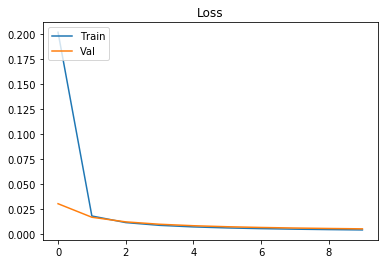

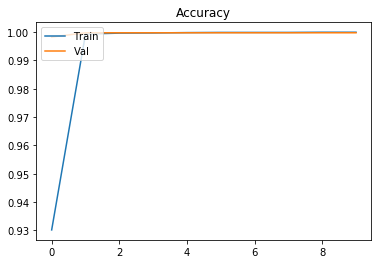

In [14]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [15]:
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res #2,2 est bien vert et -2,-2 est bien en rouge cf le premier graphe   

[[4.8818951e-04 9.9951184e-01]
 [9.9967837e-01 3.2164989e-04]]


['green', 'red']

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [16]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

[[0.5519873  0.44801277]
 [0.92860126 0.07139874]
 [0.9927689  0.00723118]]


['darkred', 'darkred', 'darkred']

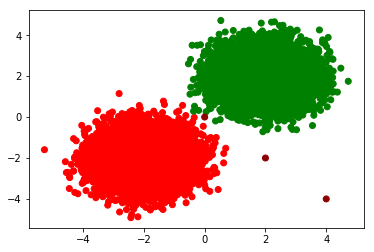

In [17]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant datas et labels, pour tester le modèle précédent

In [18]:
# example
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 522us/sample - loss: 4.0499e-04 - acc: 1.0000
Test Loss 0.0004049876588396728
Test Accuracy 1.0


In [19]:

nbr_points = 1000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()           #avoir une seule liste

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()
datas_test = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
datas_test, labels_test


(array([[-3.9501819 , -2.58406849],
        [-1.96295025, -2.64416278],
        [-1.18126888, -1.93535836],
        ...,
        [ 1.88892156,  2.32281233],
        [ 0.26575568,  0.48951712],
        [ 1.23119242,  1.88698036]]), [1, 0])

[[9.9999499e-01 5.0326630e-06]
 [9.9993443e-01 6.5594053e-05]
 [9.9883765e-01 1.1623534e-03]
 ...
 [2.4980394e-04 9.9975020e-01]
 [1.9747543e-01 8.0252457e-01]
 [1.8627270e-03 9.9813724e-01]]


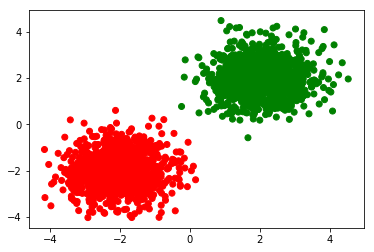

In [20]:

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()


## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [21]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

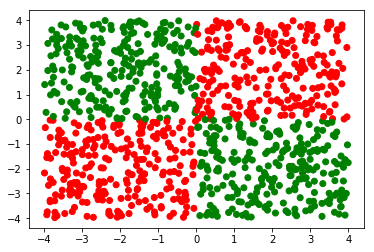

In [22]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [23]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [24]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [25]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

[[-1.49342864 -0.04155298]]
[[0.52622044 0.47377956]]
Found :  red
Should be :  red


## Résumé du modèle (couches de neurones)

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  12        
_________________________________________________________________
dense_2 (Dense)              multiple                  10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [27]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [28]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 237us/sample - loss: 0.8524 - acc: 0.3512 - val_loss: 0.8069 - val_acc: 0.3200
Epoch 2/10
800/800 [==============================] - 0s 50us/sample - loss: 0.7248 - acc: 0.3950 - val_loss: 0.6926 - val_acc: 0.4300
Epoch 3/10
800/800 [==============================] - 0s 57us/sample - loss: 0.6505 - acc: 0.4963 - val_loss: 0.6542 - val_acc: 0.5150
Epoch 4/10
800/800 [==============================] - 0s 61us/sample - loss: 0.6253 - acc: 0.6662 - val_loss: 0.6376 - val_acc: 0.7050
Epoch 5/10
800/800 [==============================] - 0s 57us/sample - loss: 0.6092 - acc: 0.7588 - val_loss: 0.6232 - val_acc: 0.7100
Epoch 6/10
800/800 [==============================] - 0s 55us/sample - loss: 0.5948 - acc: 0.7738 - val_loss: 0.6093 - val_acc: 0.7300
Epoch 7/10
800/800 [==============================] - 0s 55us/sample - loss: 0.5810 - acc: 0.7825 - val_loss: 0.5956 - val_acc: 0.7550
Epoch 8/

## Le modèle est-il bien entraîné ?

In [29]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [30]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

1000/1000 [==============================] - 0s 15us/sample - loss: 0.5372 - acc: 0.8100
Test Loss 0.5372494111061096
Test Accuracy 0.81


### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [ ]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

In [ ]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant